## 1. Obtain and review raw data
<p>One day, my old running friend and I were chatting about our running styles, training habits, and achievements, when I suddenly realized that I could take an in-depth analytical look at my training. I have been using a popular GPS fitness tracker called <a href="https://runkeeper.com/">Runkeeper</a> for years and decided it was time to analyze my running data to see how I was doing.</p>
<p>Since 2012, I've been using the Runkeeper app, and it's great. One key feature: its excellent data export. Anyone who has a smartphone can download the app and analyze their data like we will in this notebook.</p>
<p><img src="https://assets.datacamp.com/production/project_727/img/runner_in_blue.jpg" alt="Runner in blue" title="Explore world, explore your data!"></p>
<p>After logging your run, the first step is to export the data from Runkeeper (which I've done already). Then import the data and start exploring to find potential problems. After that, create data cleaning strategies to fix the issues. Finally, analyze and visualize the clean time-series data.</p>
<p>I exported seven years worth of my training data, from 2012 through 2018. The data is a CSV file where each row is a single training activity. Let's load and inspect it.</p>

In [6]:
# Import pandas
# ... YOUR CODE FOR TASK 1 ...
import pandas as pd 

# Define file containing dataset
runkeeper_file = 'C:/Users/deera/Downloads/fitness_data/Analyze Your Runkeeper Fitness Data/datasets/cardioActivities.csv'

#runkeeper_file = 'datasets/cardioActivities.csv'

# Create DataFrame with parse_dates and index_col parameters 
df_activities = pd.read_csv(
    runkeeper_file,
    parse_dates=['Date'],
    index_col='Date'
)


# First look at exported data: select sample of 3 random rows 
#display(...)
sampled_data = df_activities.sample(n=3)
print("sample of 3 random rows are :",sampled_data)

# Print DataFrame summary
# ... YOUR CODE FOR TASK 1 ...
print("DataFrame summary :",df_activities.describe())

sample of 3 random rows are :                                               Activity Id     Type Route Name  \
Date                                                                            
2017-10-19 18:22:10  85c4573b-109d-404a-a3ba-a0d62bdb9ffc  Running        NaN   
2016-08-14 12:32:07  a871f64a-5aba-44ce-b166-f3b57c4406a6  Running        NaN   
2013-01-15 18:40:08  7c512661-6a01-4ef0-80dd-b8119d5f8a59  Running        NaN   

                     Distance (km) Duration Average Pace  \
Date                                                       
2017-10-19 18:22:10           8.85    50:41         5:44   
2016-08-14 12:32:07          21.16  2:04:44         5:54   
2013-01-15 18:40:08           6.72    32:42         4:52   

                     Average Speed (km/h)  Calories Burned  Climb (m)  \
Date                                                                    
2017-10-19 18:22:10                 10.47       624.000000        144   
2016-08-14 12:32:07                 10.18   

## 2. Data preprocessing
<p>Lucky for us, the column names Runkeeper provides are informative, and we don't need to rename any columns.</p>
<p>But, we do notice missing values using the <code>info()</code> method. What are the reasons for these missing values? It depends. Some heart rate information is missing because I didn't always use a cardio sensor. In the case of the <code>Notes</code> column, it is an optional field that I sometimes left blank. Also, I only used the <code>Route Name</code> column once, and never used the <code>Friend's Tagged</code> column.</p>
<p>We'll fill in missing values in the heart rate column to avoid misleading results later, but right now, our first data preprocessing steps will be to:</p>
<ul>
<li>Remove columns not useful for our analysis.</li>
<li>Replace the "Other" activity type to "Unicycling" because that was always the "Other" activity.</li>
<li>Count missing values.</li>
</ul>

In [7]:
# Define list of columns to be deleted
cols_to_drop = ['Friend\'s Tagged','Route Name','GPX File','Activity Id','Calories Burned', 'Notes']

# Delete unnecessary columns
# ... YOUR CODE FOR TASK 2 ...

df_activities = df_activities.drop(columns=cols_to_drop)
# Count types of training activities
activity_counts  = df_activities['Type'].value_counts()
print("types of training activities",activity_counts)

# Rename 'Other' type to 'Unicycling'
df_activities['Type'] = df_activities['Type'].replace('Other', 'Unicycling')
print(df_activities['Type'].value_counts())
# Count missing values for each column
# ... YOUR CODE FOR TASK 2 ...
missing_values = df_activities.isnull().sum()
print(missing_values)

types of training activities Type
Running    459
Cycling     29
Walking     18
Other        2
Name: count, dtype: int64
Type
Running       459
Cycling        29
Walking        18
Unicycling      2
Name: count, dtype: int64
Type                          0
Distance (km)                 0
Duration                      0
Average Pace                  0
Average Speed (km/h)          0
Climb (m)                     0
Average Heart Rate (bpm)    214
dtype: int64


## 3. Dealing with missing values
<p>As we can see from the last output, there are 214 missing entries for my average heart rate.</p>
<p>We can't go back in time to get those data, but we can fill in the missing values with an average value. This process is called <em>mean imputation</em>. When imputing the mean to fill in missing data, we need to consider that the average heart rate varies for different activities (e.g., walking vs. running). We'll filter the DataFrames by activity type (<code>Type</code>) and calculate each activity's mean heart rate, then fill in the missing values with those means.</p>

In [8]:
# Calculate sample means for heart rate for each training activity type 
avg_hr_run = df_activities[df_activities['Type'] == 'Running']['Average Heart Rate (bpm)'].mean()
avg_hr_cycle = df_activities[df_activities['Type'] == 'Cycling']['Average Heart Rate (bpm)'].mean()
print("Average Heart Rate During Running",avg_hr_run)
print("Average Heart Rate During Cycling",avg_hr_cycle)

# Split whole DataFrame into several, specific for different activities
df_run = df_activities[df_activities['Type'] == 'Running'].copy()
df_walk = df_activities[df_activities['Type'] == 'Walking'].copy()
df_cycle = df_activities[df_activities['Type'] == 'Cycling'].copy()

# Filling missing values with counted means  
# Calculate the average heart rate for running
avg_hr_run = df_activities[df_activities['Type'] == 'Running']['Average Heart Rate (bpm)'].mean()
print("Average Heart Rate For Running",avg_hr_run)
df_walk['Average Heart Rate (bpm)'].fillna(110, inplace=True)
df_run['Average Heart Rate (bpm)'].fillna(int(avg_hr_run), inplace=True)
# ... YOUR CODE FOR TASK 3 ...

# Count missing values for each column in running data
# ... YOUR CODE FOR TASK 3 ...
missing_values = df_run.isna().sum()
print("Missing Value",missing_values)


Average Heart Rate During Running 144.985559566787
Average Heart Rate During Cycling 124.4
Average Heart Rate For Running 144.985559566787
Missing Value Type                        0
Distance (km)               0
Duration                    0
Average Pace                0
Average Speed (km/h)        0
Climb (m)                   0
Average Heart Rate (bpm)    0
dtype: int64


# 4. Plot running data
<p>Now we can create our first plot! As we found earlier, most of the activities in my data were running (459 of them to be exact). There are only 29, 18, and two instances for cycling, walking, and unicycling, respectively. So for now, let's focus on plotting the different running metrics.</p>
<p>An excellent first visualization is a figure with four subplots, one for each running metric (each numerical column). Each subplot will have a different y-axis, which is explained in each legend. The x-axis, <code>Date</code>, is shared among all subplots.</p>

In [9]:
#print(df_activities.columns)
#print(df_run.columns)
#print(df_run.index)
df_run = df_run.reset_index()


#df_run.head()

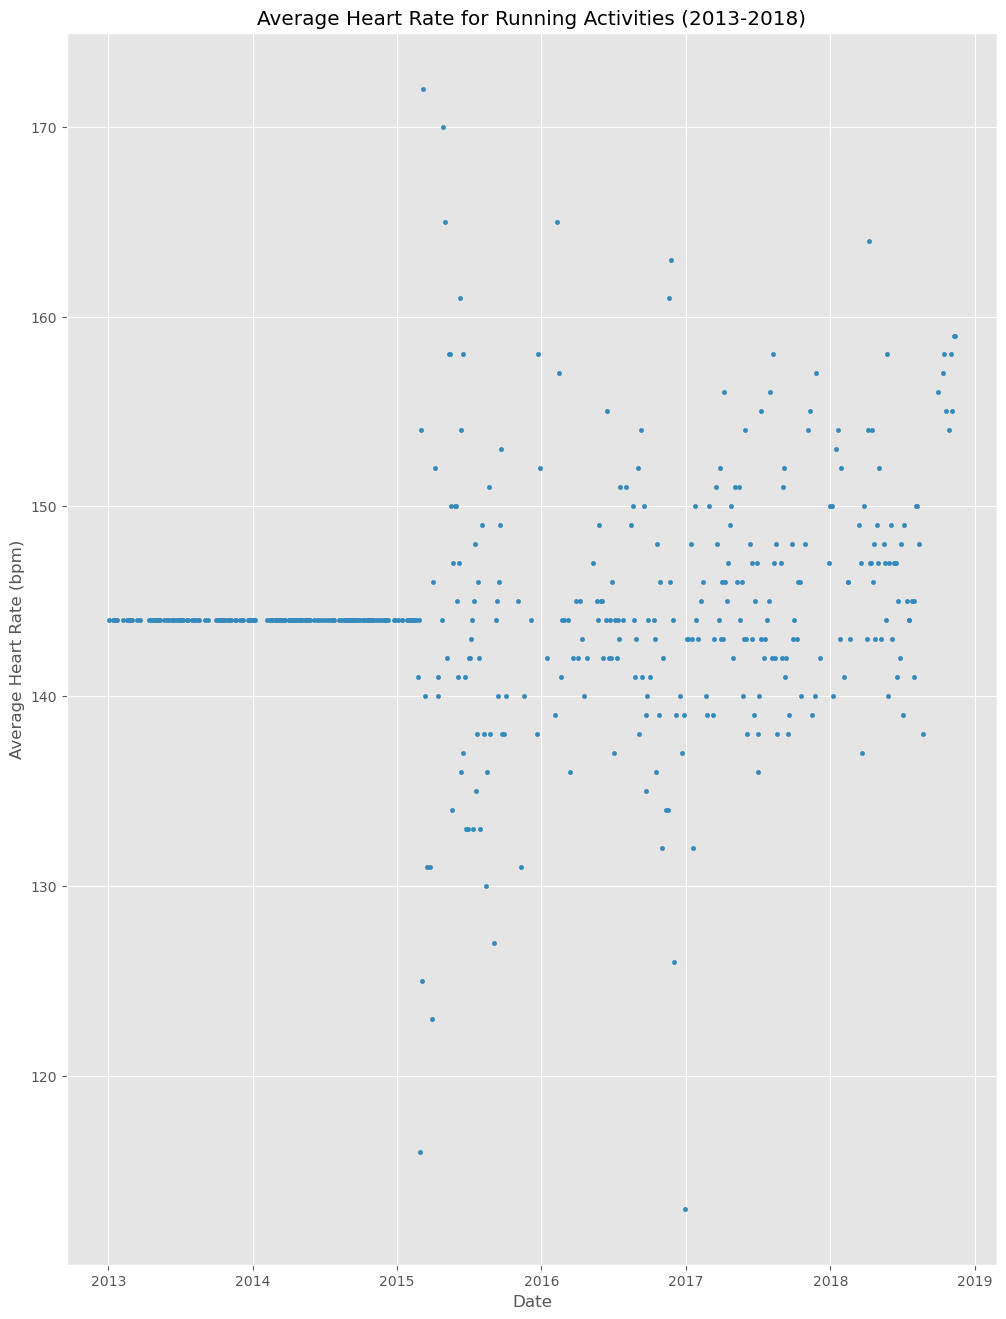

In [10]:

# Prepare data subsetting period from 2013 till 2018
# Filter the data for the period from 2013 through 2018
runs_subset_2013_2018 = df_run[(df_run['Date'].dt.year >= 2013) & (df_run['Date'].dt.year <= 2018)]

# Sort the data so that the most recent records are first
runs_subset_2013_2018 = runs_subset_2013_2018.sort_values(by='Date', ascending=False)

import pandas as pd
import matplotlib.pyplot as plt
import warnings

# Set style and ignore warnings
plt.style.use('ggplot')
warnings.filterwarnings(
    action='ignore', module='matplotlib.figure', category=UserWarning,
    message=('This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.')
)

# Create, plot, and customize in one step
runs_subset_2013_2018.plot(x='Date',
                           y='Average Heart Rate (bpm)',
                           kind='scatter',
                           sharex=False,
                           figsize=(12, 16),
                           marker='o',
                           s=9,  # Use 's' for marker size
                          )
plt.xlabel('Date')
plt.ylabel('Average Heart Rate (bpm)')  # Fixed the unterminated string
plt.title('Average Heart Rate for Running Activities (2013-2018)')
plt.grid(True)

# Show plot
plt.show()

                          


## 5. Running statistics
<p>No doubt, running helps people stay mentally and physically healthy and productive at any age. And it is great fun! When runners talk to each other about their hobby, we not only discuss our results, but we also discuss different training strategies. </p>
<p>You'll know you're with a group of runners if you commonly hear questions like:</p>
<ul>
<li>What is your average distance?</li>
<li>How fast do you run?</li>
<li>Do you measure your heart rate?</li>
<li>How often do you train?</li>
</ul>
<p>Let's find the answers to these questions in my data. If you look back at plots in Task 4, you can see the answer to, <em>Do you measure your heart rate?</em> Before 2015: no. To look at the averages, let's only use the data from 2015 through 2018.</p>
<p>In pandas, the <code>resample()</code> method is similar to the <code>groupby()</code> method - with <code>resample()</code> you group by a specific time span. We'll use <code>resample()</code> to group the time series data by a sampling period and apply several methods to each sampling period. In our case, we'll resample annually and weekly.</p>

In [11]:
import pandas as pd

# Prepare running data for the last 4 years (2015-2018)
runs_subset_2015_2018 = df_run[(df_run['Date'].dt.year >= 2015) & (df_run['Date'].dt.year <= 2018)]

# Select only numeric columns for aggregation
numeric_columns = runs_subset_2015_2018.select_dtypes(include='number').columns

# Calculate annual statistics (mean of relevant numeric columns per year)
annual_stats = runs_subset_2015_2018.resample('Y', on='Date')[numeric_columns].mean()
print('How my average run looks in the last 4 years:')
display(annual_stats)

# Calculate weekly statistics (mean of relevant numeric columns per week)
weekly_stats = runs_subset_2015_2018.resample('W', on='Date')[numeric_columns].mean()
print('Weekly averages of the last 4 years:')
display(weekly_stats)

# Mean weekly counts (how many runs per week on average)
weekly_counts_average = runs_subset_2015_2018.resample('W', on='Date').size().mean()
print('How many trainings per week I had on average:', weekly_counts_average)



How my average run looks in the last 4 years:


,Distance (km),Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
Date,,,,
2015-12-31,13.602805,10.998902,160.170732,143.353659
2016-12-31,11.411667,10.837778,133.194444,143.388889
2017-12-31,12.935176,10.959059,169.376471,145.247059
2018-12-31,13.339063,10.777969,191.218750,148.125000


Weekly averages of the last 4 years:


,Distance (km),Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
Date,,,,
2015-01-04,9.780000,11.120000,51.0,144.0
2015-01-11,NaN,NaN,NaN,NaN
2015-01-18,9.780000,11.230000,51.0,144.0
2015-01-25,NaN,NaN,NaN,NaN
2015-02-01,9.893333,10.423333,58.0,144.0
...,...,...,...,...
2018-10-14,12.620000,10.840000,146.5,157.5
2018-10-21,10.290000,10.410000,133.0,155.0
2018-10-28,13.020000,10.730000,170.0,154.0


How many trainings per week I had on average: 1.5


## 6. Visualization with averages
<p>Let's plot the long term averages of my distance run and my heart rate with their raw data to visually compare the averages to each training session. Again, we'll use the data from 2015 through 2018.</p>
<p>In this task, we will use <code>matplotlib</code> functionality for plot creation and customization.</p>

In [12]:
#print(df_run.index)
df_run.head()
#df_run = df_run.reset_index()

,Date,Type,Distance (km),Duration,Average Pace,Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
0,2018-11-11 14:05:12,Running,10.44,58:40,5:37,10.68,130,159.0
1,2018-11-09 15:02:35,Running,12.84,1:14:12,5:47,10.39,168,159.0
2,2018-11-04 16:05:00,Running,13.01,1:15:16,5:47,10.37,171,155.0
3,2018-11-01 14:03:58,Running,12.98,1:14:25,5:44,10.47,169,158.0
4,2018-10-27 17:01:36,Running,13.02,1:12:50,5:36,10.73,170,154.0


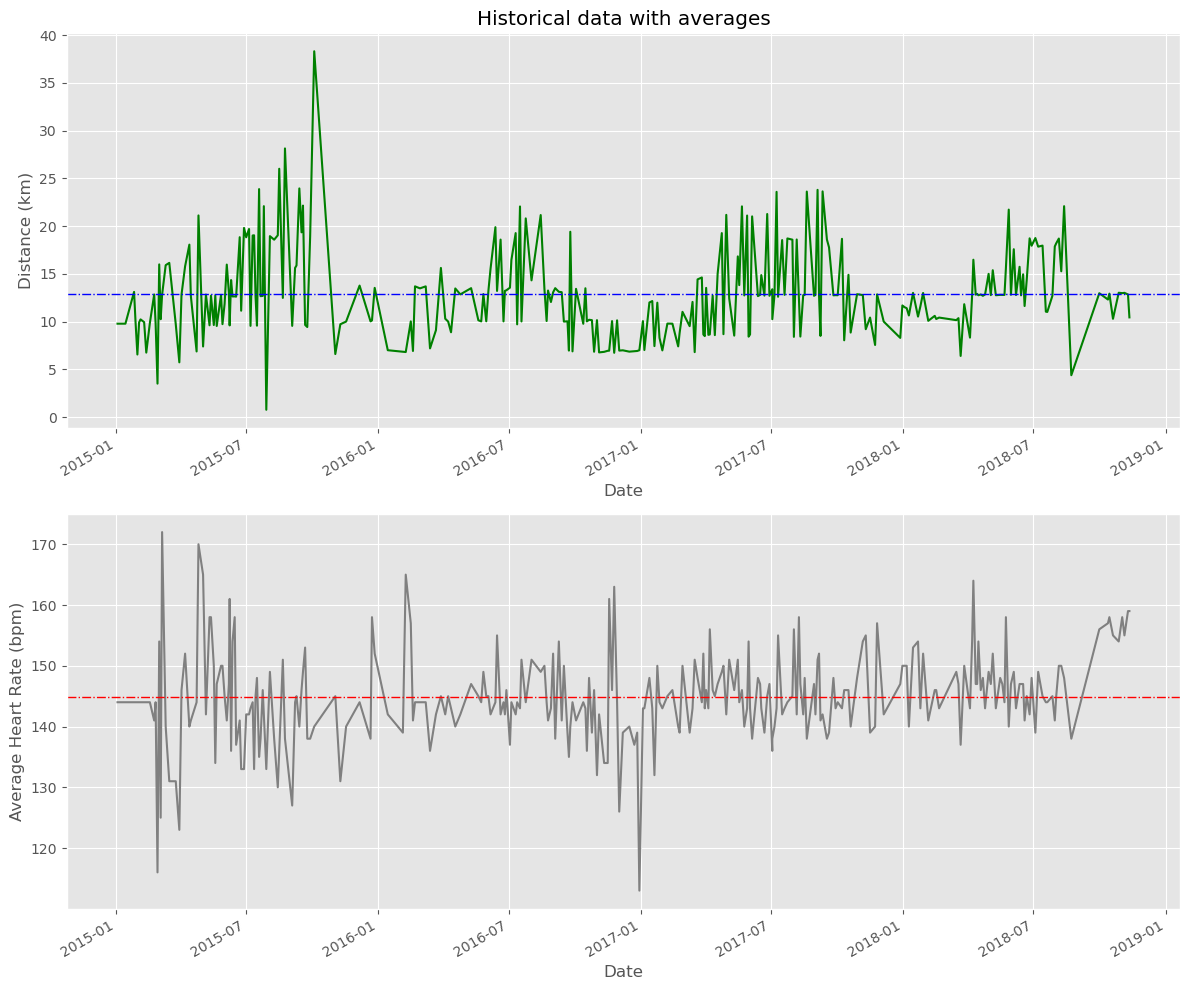

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Prepare data
# Ensure the DataFrame is sorted by the Date index
df_run = df_run.sort_index()


# Assuming 'Date' is 
runs_subset_2015_2018 = df_run['2015':'2018']


runs_distance = runs_subset_2015_2018['Distance (km)']
runs_hr = runs_subset_2015_2018['Average Heart Rate (bpm)']

# Create plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot and customize first subplot (Distance)
runs_distance.plot(ax=ax1, color='green')
ax1.set(ylabel='Distance (km)', title='Historical data with averages')
ax1.axhline(runs_distance.mean(), color='blue', linewidth=1, linestyle='-.')
ax1.grid(True)

# Plot and customize second subplot (Average Heart Rate)
runs_hr.plot(ax=ax2, color='gray')
ax2.set(xlabel='Date', ylabel='Average Heart Rate (bpm)')
ax2.axhline(runs_hr.mean(), color='red', linewidth=1, linestyle='-.')
ax2.grid(True)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()



## 7. Did I reach my goals?
<p>To motivate myself to run regularly, I set a target goal of running 1000 km per year. Let's visualize my annual running distance (km) from 2013 through 2018 to see if I reached my goal each year. Only stars in the green region indicate success.</p>

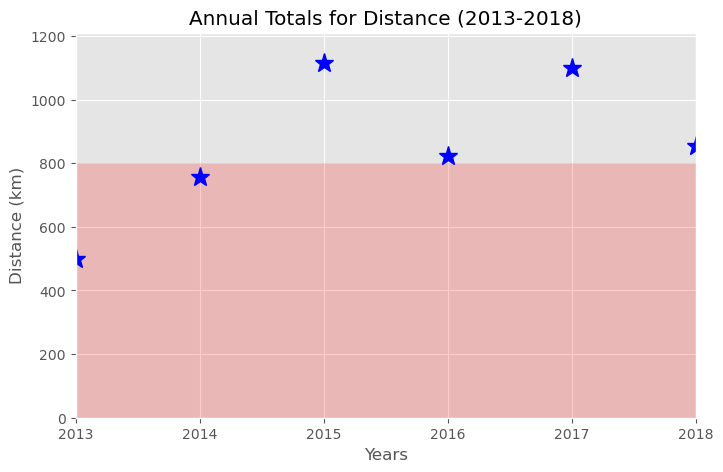

In [17]:
import pandas as pd
import matplotlib.pyplot as plt



# Subset data from 2013 through 2018
df_run_filtered = df_run.loc['2013':'2018']

# Select the 'Distance (km)' column and compute annual totals
df_run_dist_annual = df_run_filtered['Distance (km)'].resample('A').sum()

# Create the plot
plt.figure(figsize=(8.0, 5.0))
ax = df_run_dist_annual.plot(marker='*', markersize=14, linewidth=0, color='blue')

# Customize the plot
ax.set(ylim=[0, 1210], 
       ylabel='Distance (km)',
       xlabel='Years',
       title='Annual Totals for Distance (2013-2018)')

ax.axhspan(0, 800, color='red', alpha=0.2)

# Show the plot
plt.show()


## 8. Am I progressing?
<p>Let's dive a little deeper into the data to answer a tricky question: am I progressing in terms of my running skills? </p>
<p>To answer this question, we'll decompose my weekly distance run and visually compare it to the raw data. A red trend line will represent the weekly distance run.</p>
<p>We are going to use <code>statsmodels</code> library to decompose the weekly trend.</p>

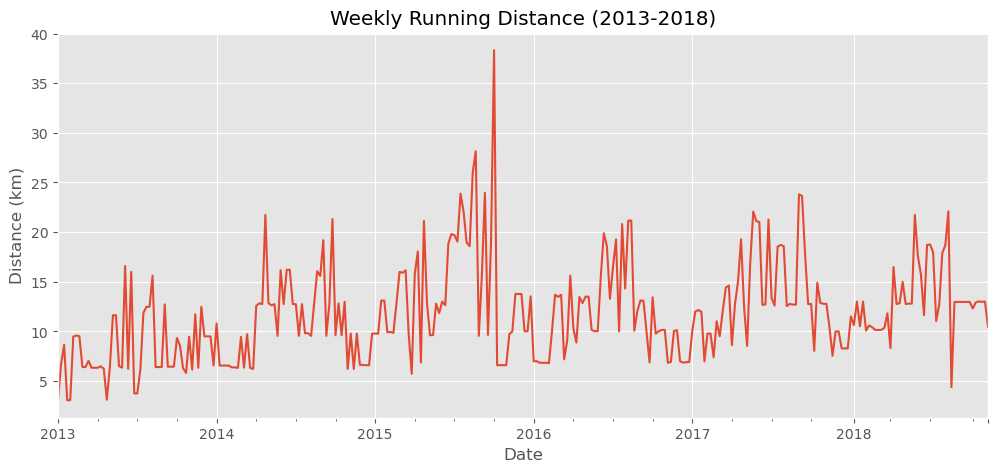

In [18]:
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt



# Subset df_run from 2013 through 2018, select Distance (km) column, resample weekly, and fill NaN values
df_run_filtered = df_run.loc['2013':'2018']
df_run_dist_wkly = df_run_filtered['Distance (km)'].resample('W').bfill()

# Create the plot
plt.figure(figsize=(12, 5))
ax = df_run_dist_wkly.plot()

# Customize the plot
ax.set_ylabel('Distance (km)')
ax.set_xlabel('Date')
ax.set_title('Weekly Running Distance (2013-2018)')

plt.show()


## 9. Training intensity
<p>Heart rate is a popular metric used to measure training intensity. Depending on age and fitness level, heart rates are grouped into different zones that people can target depending on training goals. A target heart rate during moderate-intensity activities is about 50-70% of maximum heart rate, while during vigorous physical activity it’s about 70-85% of maximum.</p>
<p>We'll create a distribution plot of my heart rate data by training intensity. It will be a visual presentation for the number of activities from predefined training zones. </p>

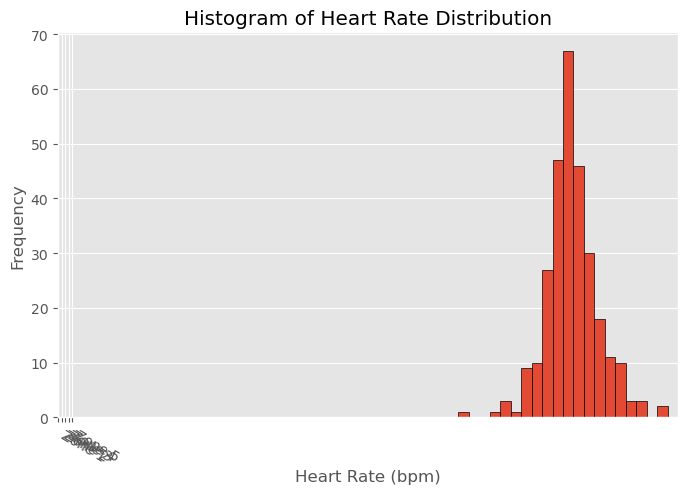

In [19]:
# Subset df_run from March 2015 through 2018, select Average Heart Rate (bpm) column
df_run_hr_all = df_run.loc['2015-03':'2018', 'Average Heart Rate (bpm)']

# Create the plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(df_run_hr_all, bins=20, edgecolor='black')

# Customize x-axis ticks 
zone_names = ['Zone 1', 'Zone 2', 'Zone 3', 'Zone 4', 'Zone 5']  
ax.set_xticks(range(len(zone_names)))
ax.set_xticklabels(zone_names, rotation=-30, ha='left')

# Customize labels
ax.set_xlabel('Heart Rate (bpm)')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Heart Rate Distribution')

plt.show()


## 10. Detailed summary report
<p>With all this data cleaning, analysis, and visualization, let's create detailed summary tables of my training. </p>
<p>To do this, we'll create two tables. The first table will be a summary of the distance (km) and climb (m) variables for each training activity. The second table will list the summary statistics for the average speed (km/hr), climb (m), and distance (km) variables for each training activity.</p>

In [20]:
print(df_run.columns)
print(df_walk.columns)
print(df_cycle.columns)


Index(['Type', 'Distance (km)', 'Duration', 'Average Pace',
       'Average Speed (km/h)', 'Climb (m)', 'Average Heart Rate (bpm)'],
      dtype='object')
Index(['Type', 'Distance (km)', 'Duration', 'Average Pace',
       'Average Speed (km/h)', 'Climb (m)', 'Average Heart Rate (bpm)'],
      dtype='object')
Index(['Type', 'Distance (km)', 'Duration', 'Average Pace',
       'Average Speed (km/h)', 'Climb (m)', 'Average Heart Rate (bpm)'],
      dtype='object')


In [21]:
import pandas as pd



# Concatenate df_run, df_walk, and df_cycle
df_run_walk_cycle = pd.concat([df_run, df_walk, df_cycle]).sort_index(ascending=False)

# Define the columns to select for distance and climb
dist_climb_cols = ['Distance (km)', 'Climb (m)']  

# Group by activity type and sum the selected columns
df_totals = df_run_walk_cycle.groupby('Type')[dist_climb_cols].sum()

# Use stack() to reshape the summary report
df_summary = df_totals.stack()

# Display the reshaped summary
print(df_summary)



Type                  
Cycling  Distance (km)      680.58
         Climb (m)         6976.00
Running  Distance (km)     5224.50
         Climb (m)        57278.00
Walking  Distance (km)       33.45
         Climb (m)          349.00
dtype: float64


## 11. Fun facts
<p>To wrap up, let’s pick some fun facts out of the summary tables and solve the last exercise.</p>
<p>These data (my running history) represent 6 years, 2 months and 21 days. And I remember how many running shoes I went through–7.</p>
<pre><code>FUN FACTS
- Average distance: 11.38 km
- Longest distance: 38.32 km
- Highest climb: 982 m
- Total climb: 57,278 m
- Total number of km run: 5,224 km
- Total runs: 459
- Number of running shoes gone through: 7 pairs
</code></pre>
<p>The story of Forrest Gump is well known–the man, who for no particular reason decided to go for a "little run." His epic run duration was 3 years, 2 months and 14 days (1169 days). In the picture you can see Forrest’s route of 24,700 km.  </p>
<pre><code>FORREST RUN FACTS
- Average distance: 21.13 km
- Total number of km run: 24,700 km
- Total runs: 1169
- Number of running shoes gone through: ...
</code></pre>
<p>Assuming Forest and I go through running shoes at the same rate, figure out how many pairs of shoes Forrest needed for his run.</p>
<p><img src="https://assets.datacamp.com/production/project_727/img/Forrest_Gump_running_route.png" alt="Forrest's route" title="Little run of Forrest Gump"></p>

In [22]:
import pandas as pd

# Define the data
data = {
    'Metric': [
        'Average distance',
        'Longest distance',
        'Highest climb',
        'Total climb',
        'Total number of km run',
        'Total runs',
        'Number of running shoes gone through'
    ],
    'Value': [
        11.38,                # Average distance in km
        38.32,                # Longest distance in km
        982,                  # Highest climb in meters
        57278,                # Total climb in meters
        5224,                 # Total number of km run
        459,                  # Total runs
        7                     # Number of running shoes gone through
    ]
}

# Create DataFrame
df_fun_facts = pd.DataFrame(data).set_index('Metric')

# Display the DataFrame
print(df_fun_facts)


                                         Value
Metric                                        
Average distance                         11.38
Longest distance                         38.32
Highest climb                           982.00
Total climb                           57278.00
Total number of km run                 5224.00
Total runs                              459.00
Number of running shoes gone through      7.00


In [23]:
import pandas as pd
import numpy as np

# Define the data
data = {
    'Metric': [
        'Average distance',
        'Total number of km run',
        'Total runs',
        'Number of running shoes gone through'
    ],
    'Value': [
        21.13,                # Average distance in km
        24700,                # Total number of km run
        1169,                 # Total runs
        np.nan                 # Number of running shoes gone through (unknown)
    ]
}

# Create DataFrame
df_forrest_run_facts = pd.DataFrame(data).set_index('Metric')

# Display the DataFrame
print(df_forrest_run_facts)


                                         Value
Metric                                        
Average distance                         21.13
Total number of km run                24700.00
Total runs                             1169.00
Number of running shoes gone through       NaN


In [25]:
import pandas as pd

# Define the FUN FACTS DataFrame
data_fun_facts = {
    'Metric': [
        'Average distance',
        'Longest distance',
        'Highest climb',
        'Total climb',
        'Total number of km run',
        'Total runs',
        'Number of running shoes gone through'
    ],
    'Value': [
        11.38,  # Average distance in km
        38.32,  # Longest distance in km
        982,    # Highest climb in meters
        57278,  # Total climb in meters
        5224,   # Total number of km run
        459,    # Total runs
        7       # Number of running shoes gone through
    ]
}

data_forrest_run_facts = {
    'Metric': [
        'Average distance',
        'Longest distance',
        'Highest climb',
        'Total climb',
        'Total number of km run',
        'Total runs',
        'Number of running shoes gone through'
    ],
    'Value': [
        12.00,  # Example values, you can adjust accordingly
        40.00,
        1000,
        60000,
        6000,
        500,
        8
    ]
}

# Create DataFrames
df_fun_facts = pd.DataFrame(data_fun_facts).set_index('Metric')
df_forrest_run_facts = pd.DataFrame(data_forrest_run_facts).set_index('Metric')

# Example data retrieval
total_km_run_fun_facts = df_fun_facts.loc['Total number of km run', 'Value']
number_of_pairs_of_shoes = df_fun_facts.loc['Number of running shoes gone through', 'Value']

# Calculate instructor's average shoes per lifetime
average_shoes_per_lifetime = total_km_run_fun_facts / number_of_pairs_of_shoes

# Retrieve total kilometers run from FORREST RUN FACTS
total_km_run_forrest = df_forrest_run_facts.loc['Total number of km run', 'Value']

# Calculate the estimated number of shoes gone through for Forrest Gump's route
estimated_shoes_forrest = total_km_run_forrest // average_shoes_per_lifetime

print(f"Average shoes per lifetime: {average_shoes_per_lifetime:.2f}")
print(f"Estimated number of shoes Forrest Gump would have gone through: {estimated_shoes_forrest:.0f}")




Average shoes per lifetime: 746.29
Estimated number of shoes Forrest Gump would have gone through: 8
